Objective 1

KNN Accuracy: 0.77


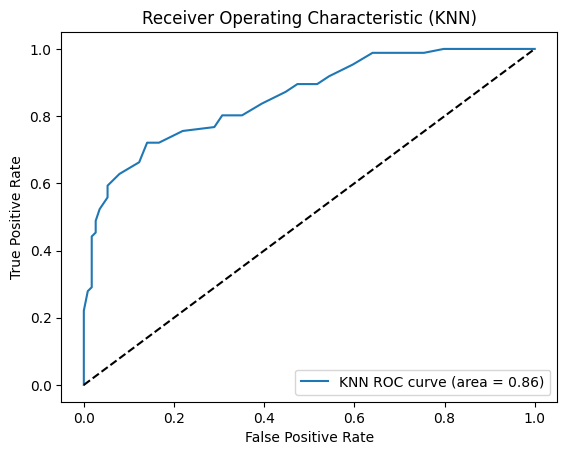

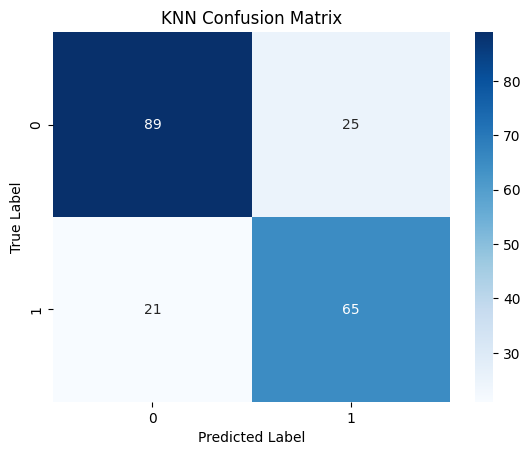

Decision Tree Accuracy: 0.695


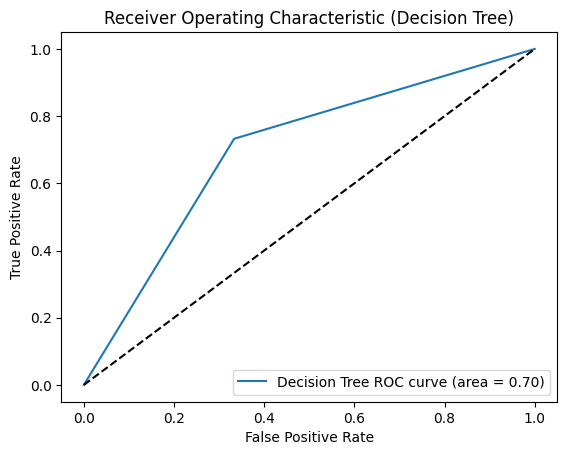

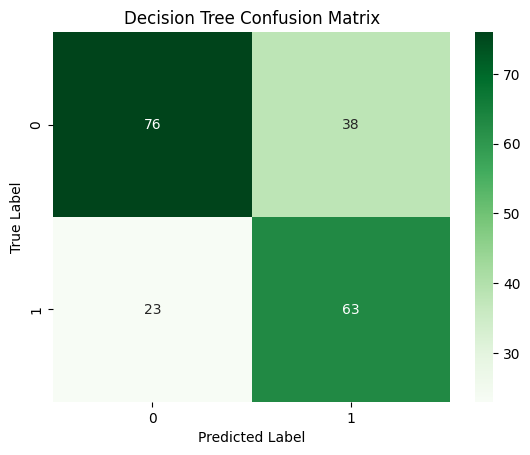

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset and reading it
df = pd.read_csv('/content/credit_train.csv')

# Removing unnecessary columns
df = df.drop(['Loan ID', 'Customer ID', 'Years in current job', 'Home Ownership', 'Purpose', 'Bankruptcies', 'Tax Liens'], axis=1)

# Handle missing values in integer columns (before sampling)
int_cols = df.select_dtypes(include=['int64']).columns
df[int_cols] = df[int_cols].fillna(df[int_cols].mean())

# Handle missing values in categorical columns (before sampling)
df['Loan Status'] = df['Loan Status'].fillna('Missing')
df['Term'] = df['Term'].fillna('Missing')

# Sampling the dataset (after preprocessing)
df_sampled = df.sample(n=1000, random_state=42)

# One-hot encode categorical columns using ColumnTransformer
categorical_cols = df_sampled.select_dtypes(include=['object']).columns
numerical_cols = df_sampled.select_dtypes(exclude=['object']).columns

transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols),
        ('passthrough', 'passthrough', numerical_cols)
    ])

df_final = pd.DataFrame(transformer.fit_transform(df_sampled), columns=transformer.get_feature_names_out())

# Impute all numerical columns
numerical_cols_with_nan = df_final.filter(like='passthrough__').columns
imputer_mean = SimpleImputer(strategy='mean')
df_final[numerical_cols_with_nan] = imputer_mean.fit_transform(df_final[numerical_cols_with_nan])

# Scaling
scaler = StandardScaler()
df_final[numerical_cols_with_nan] = scaler.fit_transform(df_final[numerical_cols_with_nan])

# Create a binary target based on the median of 'passthrough__Maximum Open Credit'
median_max_credit = df_final['passthrough__Maximum Open Credit'].median()
df_final['target_binary'] = (df_final['passthrough__Maximum Open Credit'] > median_max_credit).astype(int)

# 1. Identify Features (X) and Target (y)
target_column = 'target_binary'
y = df_final[target_column]
X = df_final.drop(['passthrough__Maximum Open Credit', 'target_binary'], axis=1) #remove the original target and the new target.

# 2. Perform the Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=45)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# ROC Curve for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# ROC Curve for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Objective 2

KNN Accuracy: 0.71


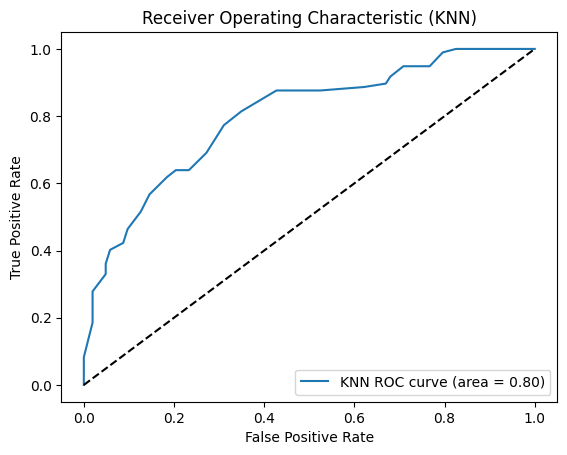

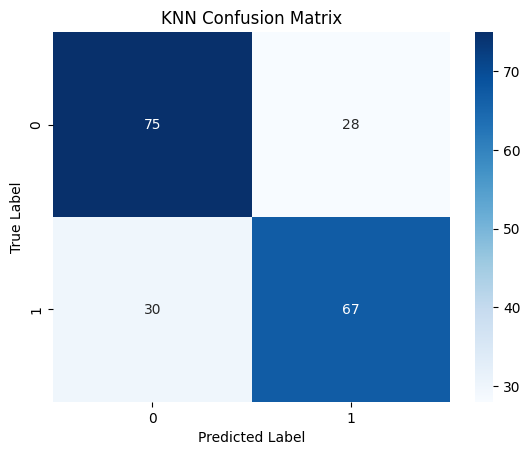

Decision Tree Accuracy: 0.695


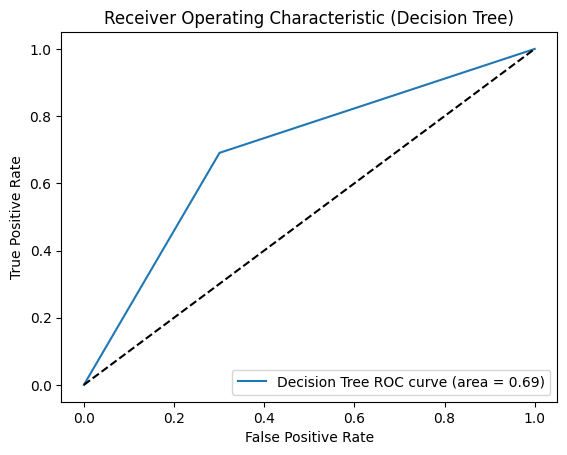

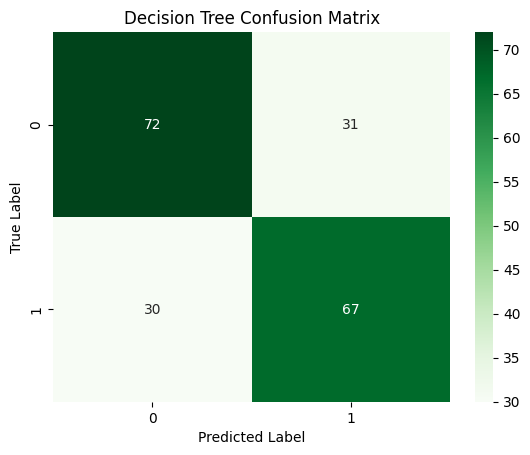

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset and reading it
df = pd.read_csv('/content/credit_train.csv')

# Removing unnecessary columns
df = df.drop(['Loan ID', 'Customer ID', 'Years in current job', 'Home Ownership', 'Purpose', 'Bankruptcies', 'Tax Liens', 'Maximum Open Credit'], axis=1)

# Handle missing values in integer columns (before sampling)
int_cols = df.select_dtypes(include=['int64']).columns
df[int_cols] = df[int_cols].fillna(df[int_cols].mean())

# Handle missing values in categorical columns (before sampling)
df['Loan Status'] = df['Loan Status'].fillna('Missing')
df['Term'] = df['Term'].fillna('Missing')

# Sampling the dataset (after preprocessing)
df_sampled = df.sample(n=1000, random_state=42)

# One-hot encode categorical columns using ColumnTransformer
categorical_cols = df_sampled.select_dtypes(include=['object']).columns
numerical_cols = df_sampled.select_dtypes(exclude=['object']).columns

transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols),
        ('passthrough', 'passthrough', numerical_cols)
    ])

df_final = pd.DataFrame(transformer.fit_transform(df_sampled), columns=transformer.get_feature_names_out())

# Impute all numerical columns
numerical_cols_with_nan = df_final.filter(like='passthrough__').columns
imputer_mean = SimpleImputer(strategy='mean')
df_final[numerical_cols_with_nan] = imputer_mean.fit_transform(df_final[numerical_cols_with_nan])

# Scaling
scaler = StandardScaler()
df_final[numerical_cols_with_nan] = scaler.fit_transform(df_final[numerical_cols_with_nan])

# Create a binary target based on the median of 'passthrough__Current Credit Balance'
median_current_credit = df_final['passthrough__Current Credit Balance'].median()
df_final['target_binary'] = (df_final['passthrough__Current Credit Balance'] > median_current_credit).astype(int)

# 1. Identify Features (X) and Target (y)
target_column = 'target_binary'
y = df_final[target_column]
X = df_final.drop(['passthrough__Current Credit Balance', 'target_binary'], axis=1)  # Remove original target and new target

# 2. Perform the Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=45)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# ROC Curve for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# ROC Curve for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()